# 1.Import Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

# 2.Load Dataset

In [60]:
data=pd.read_csv(r"C:\Users\24SRV\Downloads\heart_disease_uci.csv")
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 3.Exploratory Data Analysis (EDA)

In [61]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [62]:
print(data.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [63]:
print("Missing values:\n", data.isna().sum())

Missing values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [64]:

print("Duplicates:", data.duplicated().sum())

Duplicates: 0


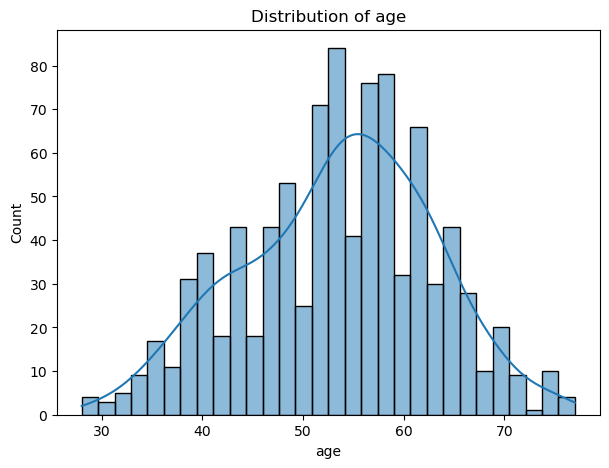

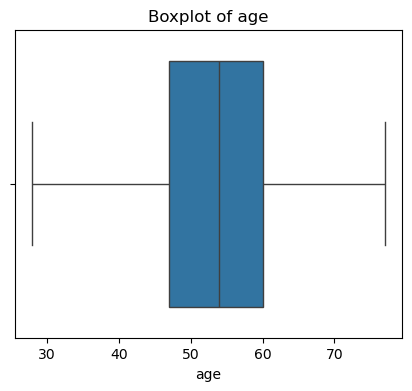

The skew of age -0.195993861608106


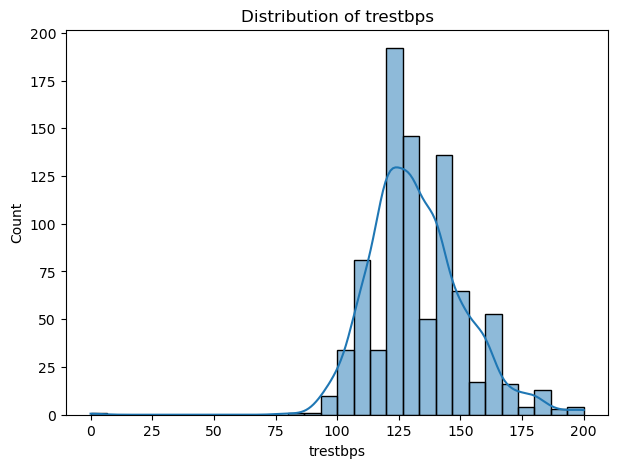

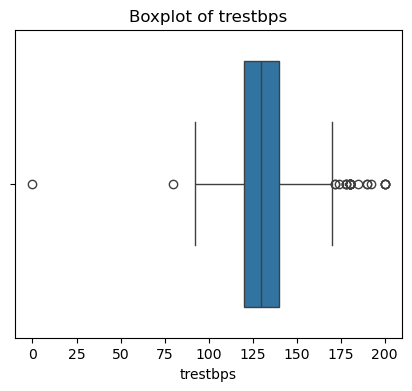

The skew of trestbps 0.21333446967212508


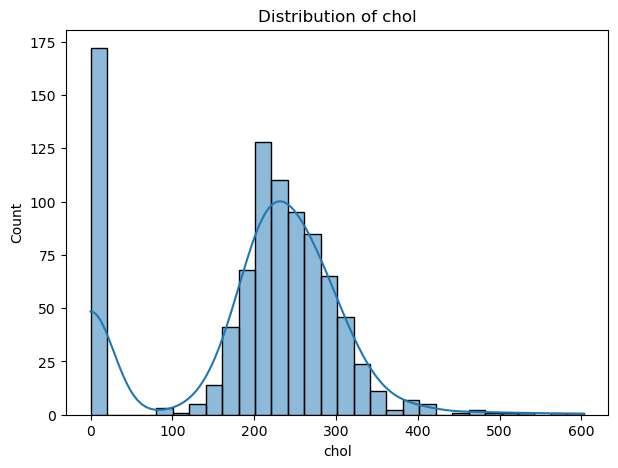

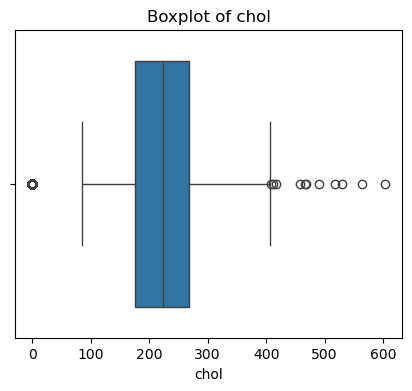

The skew of chol -0.6138360897370758


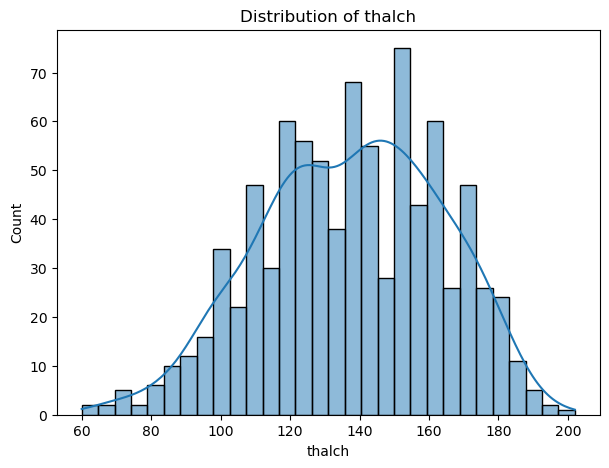

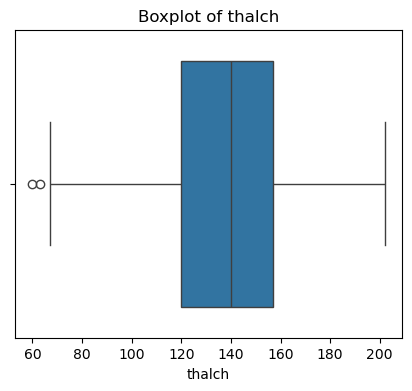

The skew of thalch -0.21111858073161133


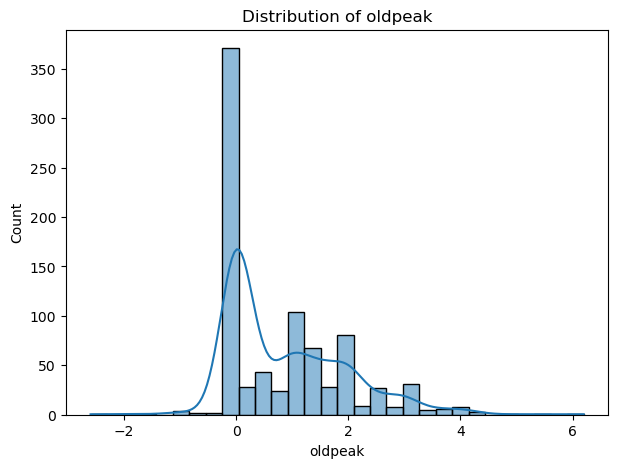

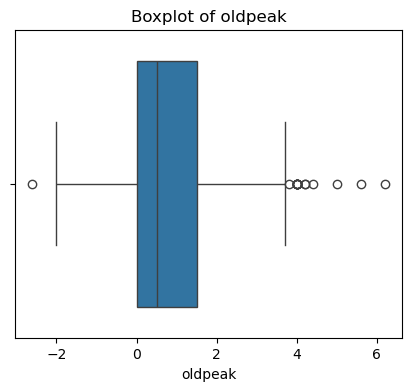

The skew of oldpeak 1.0414266146339854


In [65]:

numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for col in numeric_cols:
    plt.figure(figsize=(7,5))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    plt.figure(figsize=(5,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    print(f"The skew of {col}" ,data[col].skew())


In [66]:
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0 )

In [67]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


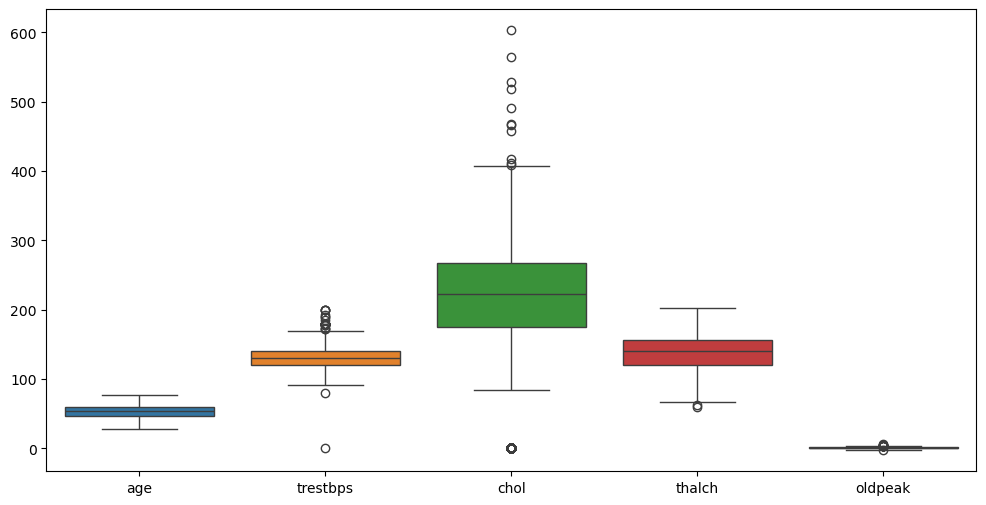

In [68]:
plt.figure(figsize=(12,6))
sns.boxplot(data[numeric_cols])
plt.show()

# 4.Data preprocessing

# Drop irrelevant columns

In [69]:
data.drop(columns=["id","dataset"] , axis=1 , inplace=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Handle missing values

In [70]:
data.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [71]:
for col in data.columns:
    if data[col].isna().sum()>0:
        if data[col].dtype=="object":
            imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
            data[[col]]=imputer.fit_transform(data[[col]])
        else:
            skewness=data[col].skew()
            if abs(skewness)<0.5:
                 imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
                 data[[col]]=imputer.fit_transform(data[[col]])
            else:
                imputer=SimpleImputer(missing_values=np.nan,strategy="median")
                data[[col]]=imputer.fit_transform(data[[col]])



In [72]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Handle outliers

In [73]:
for col in numeric_cols :
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    data[col] = np.where(data[col] < lower, lower, data[col])
    data[col] = np.where(data[col] > upper, upper, data[col])

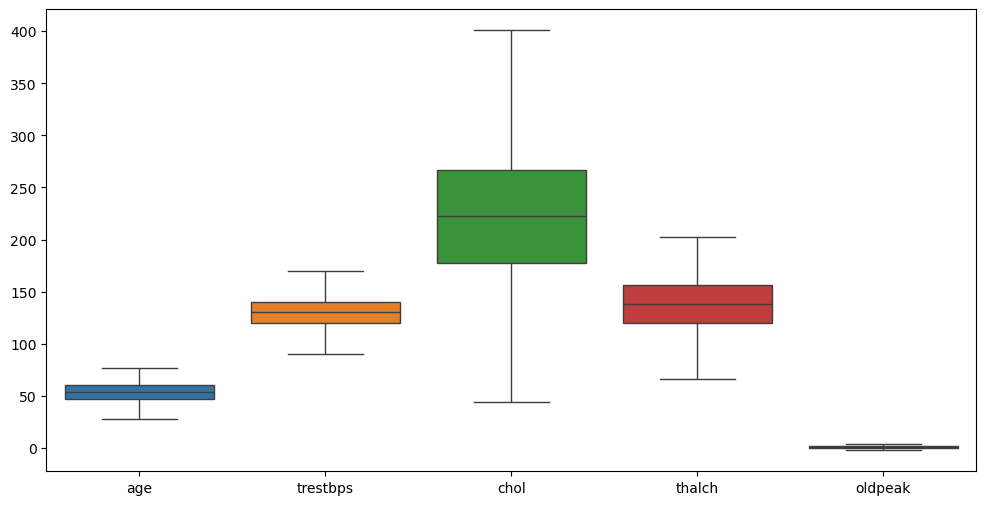

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(data[numeric_cols])
plt.show()

# Transformation for categorical columns

In [75]:
encoder=LabelEncoder()
data["sex"]=encoder.fit_transform(data["sex"])
data["exang"]=encoder.fit_transform(data["exang"])
data["fbs"]=encoder.fit_transform(data["fbs"])

In [76]:
ordinal_map = {
    'asymptomatic': 0,
    'non-anginal': 1,
    'atypical angina': 2,
    'typical angina': 3
}
data['cp'] = data['cp'].map(ordinal_map)

In [77]:
encoder2=OneHotEncoder(drop=None,sparse_output=False)
categorical_features=['slope', 'thal' , "restecg"]
encoded=encoder2.fit_transform(data[categorical_features])
encoded_df=pd.DataFrame(encoded,columns=encoder2.get_feature_names_out(categorical_features))
data.drop(data[categorical_features],axis=1,inplace=True)
data=pd.concat([data,encoded_df],axis=1)

In [78]:
data.head()

,age,sex,cp,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,63.0,1,3,145.0,233.0,1,150.0,0,2.3,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,67.0,1,0,160.0,286.0,0,108.0,1,1.5,3.0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,67.0,1,0,120.0,229.0,0,129.0,1,2.6,2.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,37.0,1,1,130.0,250.0,0,187.0,0,3.5,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,41.0,0,2,130.0,204.0,0,172.0,0,1.4,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


# 5. Split data

In [80]:
X = data.drop("num", axis=1)
y = data["num"]

In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [82]:
def checkShape(Xtrain,Xtest,Ytrain,Ytest):
    print("Xtrain shape is :", Xtrain.shape)
    print("Xtest shape is :", Xtest.shape)
    print("--"*30)
    print("Ytrain shape is :", Ytrain.shape)
    print("Ytest shape is :", Ytest.shape)

In [83]:
checkShape(X_train,X_test,Y_train,Y_test)

Xtrain shape is : (736, 19)
Xtest shape is : (184, 19)
------------------------------------------------------------
Ytrain shape is : (736,)
Ytest shape is : (184,)


# 6.Feature scalling

In [86]:
scaler=StandardScaler()
Xtrain_scaled=scaler.fit_transform(X_train)
Xtest_scaled=scaler.transform(X_test)

# 7.Model Training and Comparison

In [87]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(Y_test, y_pred))


c:\Users\24SRV\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8207
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        82
           1       0.83      0.84      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184

SVM Accuracy: 0.7446
              precision    recall  f1-score   support

           0       0.74      0.66      0.70        82
           1       0.75      0.81      0.78       102

    accuracy                           0.74       184
   macro avg       0.74      0.74      0.74       184
weighted avg       0.74      0.74      0.74       184

Random Forest Accuracy: 0.8424
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        82
           1       0.85      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      

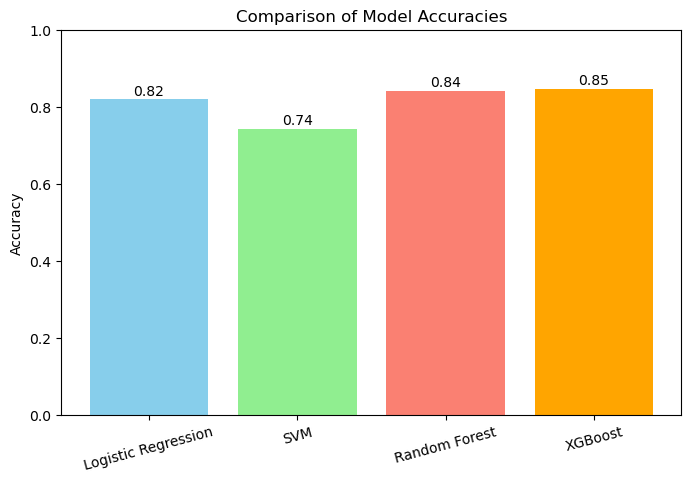

In [88]:
model_names = list(results.keys())
accuracies = list(results.values())


plt.figure(figsize=(8,5))
plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.ylim(0,1)  
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=15)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')  
plt.show()

# 8.Hyperparameter Tuning

In [89]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier()
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, Y_train)
print("Best RF Params:", grid.best_params_)

Best RF Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


# 9.Evaluation

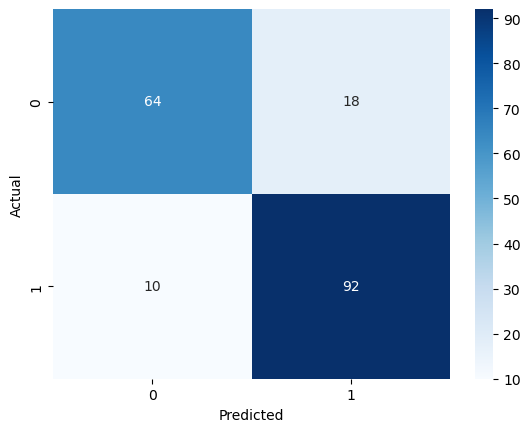

In [90]:
final_model = grid.best_estimator_
y_pred_final = final_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [91]:
print(accuracy_score(Y_test, y_pred_final))

0.8478260869565217


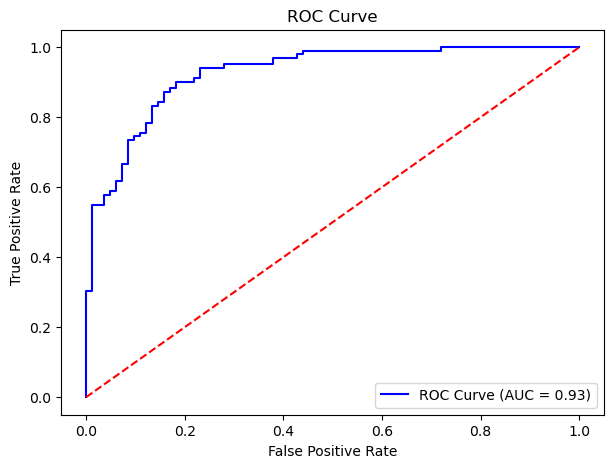

In [92]:
y_prob = final_model.predict_proba(X_test)[:,1]  

fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
auc_score = roc_auc_score(Y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 10.Feature importance

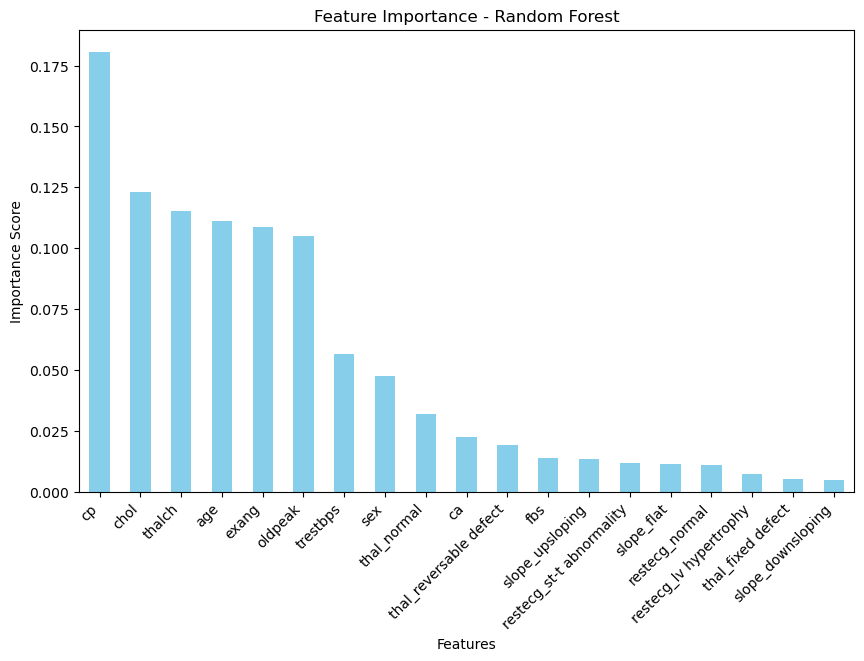

In [93]:
feature_names = X_train.columns
importances = final_model.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.show()

# 11.Save Model

In [94]:
import os
os.makedirs("models", exist_ok=True)

joblib.dump(final_model, "models/heart_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, "models/feature_columns.pkl")
print("Model, scaler, and feature columns saved!")

Model, scaler, and feature columns saved!


In [95]:
import joblib
feature_columns = joblib.load("models/feature_columns.pkl")
print(feature_columns)
print(len(feature_columns))


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'slope_downsloping', 'slope_flat', 'slope_upsloping', 'thal_fixed defect', 'thal_normal', 'thal_reversable defect', 'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality']
19


In [103]:
Y_test

514    1
825    1
854    1
804    1
887    0
      ..
59     0
815    1
631    1
740    1
282    1
Name: num, Length: 184, dtype: int64